In [1]:
import numpy as np
import pandas as pd
import re
import os
import sys

In [2]:
cs_file = r"data\input\gradcafe_data-master\cs\cs_clean.csv"

headers_cs = ["rowid", "uni_name", "major", "degree", "season", "decision", "decision_method", "decision_date", "decision_timestamp", "ugrad_gpa", "gre_verbal", "gre_quant", "gre_writing", "is_new_gre", "gre_subject", "status", "post_data", "post_timestamp", "comments"]
headers_cs_select = ["rowid", "uni_name", "major", "degree", "season", "decision", "ugrad_gpa", "gre_verbal", "gre_quant", "gre_writing", "is_new_gre", "gre_subject", "status", "post_data", "comments"] 

In [3]:
df = pd.read_csv(cs_file, header=None)
df.columns = headers_cs

In [4]:
df.head()

,rowid,uni_name,major,degree,season,decision,decision_method,decision_date,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,is_new_gre,gre_subject,status,post_data,post_timestamp,comments
0,0,Tufts University,CS,PhD,S16,Accepted,E-mail,16-11-2015,1.447650e+09,3.6,166.0,163.0,4.5,True,NaN,American,16-11-2015,1447650000,Met with professor beforehand. 1 year academic...
1,1,SUNY Stony Brook,CS,MS,S16,Rejected,E-mail,14-11-2015,1.447477e+09,3.5,144.0,167.0,3.0,True,NaN,International,14-11-2015,1447477200,non CS background
2,2,Columbia University,CS,MS,S16,Other,Other,14-11-2015,1.447477e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,14-11-2015,1447477200,So there was no actual Nov 15 deadline? Or did...
3,3,Columbia University,CS,PhD,S16,Other,Other,13-11-2015,1.447391e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,13-11-2015,1447390800,I haven't found the website with the deadline ...
4,4,Columbia University,CS,MS,S16,Other,Other,13-11-2015,1.447391e+09,NaN,NaN,NaN,NaN,NaN,NaN,Other,13-11-2015,1447390800,Thanks guys! Good to know I'm not the only one...


In [5]:
df.describe()

,rowid,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,gre_subject,post_timestamp
count,27822.000000,2.780500e+04,7222.000000,8493.000000,8493.000000,8248.000000,262.000000,2.782200e+04
mean,13910.500000,1.325873e+09,3.698129,288.676439,343.097021,3.863227,800.305344,1.326125e+09
std,8031.663931,7.862555e+07,0.646575,213.479164,277.912011,0.725768,90.468673,7.842295e+07
min,0.000000,4.013424e+08,0.900000,133.000000,136.000000,2.000000,200.000000,1.139375e+09
25%,6955.250000,1.267679e+09,3.500000,154.000000,163.000000,3.500000,750.000000,1.267679e+09
50%,13910.500000,1.331096e+09,3.700000,161.000000,168.000000,4.000000,820.000000,1.331226e+09
75%,20865.750000,1.394510e+09,3.870000,480.000000,740.000000,4.500000,860.000000,1.394770e+09
max,27821.000000,1.576386e+09,9.990000,800.000000,800.000000,6.000000,990.000000,1.447650e+09


In [6]:
seasons = list(set(cs_data["season"]))
univs = sorted(set(cs_data["uni_name"]))
print(len(univs))

NameError: name 'cs_data' is not defined

In [ ]:
seasons_name = ['F11',
 'S16',
 'S15',
 'F09',
 'F16',
 'S13',
 'S11',
 'F12',
 'S12',
 'F10',
 'S10',
 'F14',
 'S14',
 'F13',
 'F15']

In [ ]:
# for i in univs:
#     print(i)

In [ ]:
university_select = ["AT&T Labs Fellowship Program (ALFP)",  
"Arizona State University (ASU)",  
"Auburn University",  
"Austin, Cornell, Gatech, UMich, UToronto",  
"Austin, Cornell, Gatech, UMinn, TAMU, Stonybrook",  
"Bangladesh University Of Enginnering And Technology",  
"Beijing Institute Of Technology",  
"Birla Institute Of Technology And Science (BITS)",  
"Boston University (BU)",  
"Brandeis University",  
"Brigham Young University",  
"Brown University",  
"CUNY",  
"California Institute Of Technology (Caltech)",  
"Carnegie Mellon University (CMU)",  
"College Of William & Mary",  
"Colorado State University (CSU)",  
"Columbia University",  
"Concordia University",  
"Cornell Tech",  
"Cornell University",  
"Cornell, UCSB, UCSD",  
"Dartmouth College",  
"Delaware, Lehigh, UConn, Notre Dame",  
"Delhi College Of Engineering",  
"Drexel University",  
"Duke University",  
"ETH Zurich",  
"Emory University",  
"Florida Institute Of Technology",  
"Florida International University (FIU)",  
"Florida State University (FSU)",  
"George Mason University (GMU)",  
"George Washington University (GWU)",  
"Georgia Institute Of Technology (GTech)",  
"Georgia State University (GSU)",  
"Harvard University",  
"Hong Kong University (HKU)",  
"ITT Technical Institute",  
"Illinois Institute Of Technology",  
"Imperial College London (ICL)",  
"Indian Institute Of Science",  
"Indian Institute Of Technology (IIT)",  
"Indian Institute Of Technology, Bombay (IIT Bombay)",  
"Indian Institute Of Technology, Delhi (IIT Delhi)",  
"Indian Institute Of Technology, Guwahati (IIT Guwahati)",  
"Indian Institute Of Technology, Hyderabad (IIT Hyderabad)",  
"Indian Institute Of Technology, Jodhpur (IIT Jodhpur)",  
"Indian Institute Of Technology, Kharagpur (IIT Kharagpur)",  
"Indian Institute Of Technology, Mandi (IIT Mandi)",  
"Indian Institute Of Technology, Patna (IIT Patna)",  
"Indiana University - Purdue University Indianapolis (IUPUI)",  
"Indiana University Of Pennsylvania",  
"Indiana University, Bloomington",  
"Intel Visual Computing Institute",  
"International Institute Of Information Technology, Hyderabad (IIIT Hyderabad)",  
"Johns Hopkins University (JHU)",  
"KTH Royal Institute Of Technology",  
"King Abdullah University Of Science And Technology (KAUST)",  
"Kingston University, London",  
"Massachusetts Institute Of Technology (MIT)",  
"Max Planck",  
"Max Planck Institute For Computer Science",  
"Max Planck Institute For Informatics",  
"Max Planck Institute For Software Systems",  
"McGill Unviversity",  
"McMaster University",  
"Miami University, Ohio",  
"Michigan State University (MSU)",  
"Mumbai University",  
"NASA Aeronautics Scholarship Program (ASP)",  
"NSF Graduate Research Fellowship (NSF GRFP)",  
"NYU, Columbia",  
"NYU, Cornell, Northwestern",  
"Nanyang Technological University (NTU)",  
"National Institute Of Technology",  
"National University Of Singapore (NUS)",  
"New Jersey Institute Of Technology (NJIT)",  
"New York University (NYU)",  
"North Carolina State University (NCSU)",  
"North Caroline State University (NCSU)",  
"Northeastern University",  
"Northern Illinois University",  
"Nothwestern University",  
"Office Of Science Graduate Fellowship SCGF",  
"Ohio State University (OSU)",  
"Ohio State University, Columbus (OSU)",  
"Old Dominion University",  
"Oregon State University",  
"Peking University",  
"Pennsylvania State University (Penn State)",  
"Pennsylvania State University (PennState)",  
"Pennsylvania State University, Harrisburg (Penn State)",  
"Princeton University",  
"Pune Institute Of Computer Technology",  
"Purdue University",  
"Queens University",  
"Rajshahi University Of Engineering & Technology (RUET)",  
"Rensselaer Polytechnic Institute (RPI)",  
"Rice University",  
"Rochester Institute Of Technology (RIT)",  
"Royal Holloway University Of London",  
"Rutgers University",  
"SUNY Albany",  
"SUNY Binghamton",  
"SUNY Buffalo",  
"SUNY Stony Brook",  
"Sacramento State University",  
"San Diego State University (SDSU)",  
"San Francisco State University (SFSU)",  
"San Jose State University (SJSU)",  
"Seattle University",  
"Seoul National University (SNU)",  
"Shenzhen University",  
"Simon Fraser University (SFU)",  
"Southern Methodist University",  
"Stanford University",  
"Stevens Institute Of Technology (SIT)",  
"Syracuse University",  
"TU Munich",  
"Technical University Eindhoven",  
"Technical University Of Kaiserslautern",  
"Temple University",  
"Texas Tech University",  
"The Chinese University Of Hong Kong",  
"The Institute Of Science And Technology Austria (IST Austria)",  
"The International Max Planck Research School For Computer Science",  
"The Max Planck Institute For Informatics",  
"Toyota Technological Institute At Chicago (TTIC)",  
"Tsinghua University",  
"Tufts University",  
"USC, UCI, UCSD, UIUC, Columbia",  
"University College London",  
"University Of British Columbia",  
"University Of British Columbia (UBC)",  
"University Of Calgary",  
"University Of California, Berkeley (UCB)",  
"University Of California, Davis (UCD)",  
"University Of California, Irvine (UCI)",  
"University Of California, Los Angeles (UCLA)",  
"University Of California, Merced",  
"University Of California, Riverside", 
"University Of California, San Diego (UCSD)", 
"University Of California, San Francisco (UCSF)", 
"University Of California, Santa Barbara (UCSB)", 
"University Of California, Santa Cruz (UCSC)", 
"University Of Cambridge", 
"University Of Central Florida (UCF)", 
"University Of Chicago (UChicago)", 
"University Of Colorado, Boulder", 
"University Of Colorado, Colorado Springs", 
"University Of Colorado, Denver", 
"University Of Connecticut", 
"University Of Delaware", 
"University Of Dhaka", 
"University Of Edinburgh", 
"University Of Florida, Gainesville (UFL)", 
"University Of Georgia", 
"University Of Glasgow", 
"University Of Hartford", 
"University Of Hawaii, Manoa", 
"University Of Illinois, Chicago", 
"University Of Illinois, Chicago (UIC)", 
"University Of Illinois, Springfield", 
"University Of Illinois, Urbana-Champaign (UIUC)", 
"University Of Indiana, Bloomington", 
"University Of Iowa", 
"University Of Leeds", 
"University Of Maine", 
"University Of Manchester", 
"University Of Maryland, Baltimore County (UMBC)", 
"University Of Maryland, College Park (UMD)", 
"University Of Massachusetts, Amherst (UMass)", 
"University Of Massachusetts, Boston", 
"University Of Massachusetts, Dartmouth", 
"University Of Melbourne", 
"University Of Memphis", 
"University Of Miami", 
"University Of Michigan, Ann Arbor (UMich)", 
"University Of Michigan, Ann Arbor (Umich)", 
"University Of Montreal", 
"University Of Nevada, Las Vegas", 
"University Of Nevada, Reno", 
"University Of North Carolina, Chapel Hill (UNC)", 
"University Of North Carolina, Charlotte", 
"University Of North Dakota", 
"University Of Notre Dame", 
"University Of Nottingham", 
"University Of Ontario Institute Of Technology (UOIT)", 
"University Of Oregon", 
"University Of Ottawa", 
"University Of Oxford", 
"University Of Pennsylvania (UPenn)", 
"University Of Pittsburgh", 
"University Of Rochester", 
"University Of San Francisco", 
"University Of Santa Cruz", 
"University Of Saskatchewan", 
"University Of South Carolina", 
"University Of South Dakota", 
"University Of South Florida (USF)", 
"University Of Southern California (USC)", 
"University Of Sydney", 
"University Of Tennessee", 
"University Of Tennessee, Knoxville", 
"University Of Texas, Arlington", 
"University Of Texas, Austin (UT Austin)", 
"University Of Texas, Dallas (UT Dallas)", 
"University Of Texas, El Paso", 
"University Of Texas, San Antonio (UTSA)", 
"University Of Toronto (UofT)", 
"University Of Vermont", 
"University Of Victoria", 
"University Of Virginia (UVA)", 
"University Of Washington, Seattle (UW)", 
"University Of Waterloo", 
"University of Pennsylvania (Upenn)", 
"University of Pittsburgh", 
"University of Washington, Seattle (UW)", 
"Unviersity Of California, Davis (UCD)", 
"Virginia Commonwealth University (VCU)", 
"Virginia Tech", 
"Washington State University (WSU)", 
"Washington University, St. Louis (WUSTL)", 
"Wayne State University", 
"Worcester Polythchnic Institute (WPI)", 
"Wright State University", 
"Yale University", 
"Zhengzhou University", 
"CUNY"]

In [ ]:
university_select2 = ["AT&T Labs Fellowship Program (ALFP)",  
"Austin, Cornell, Gatech, UMich, UToronto",  
"Austin, Cornell, Gatech, UMinn, TAMU, Stonybrook",  
"Bangladesh University Of Enginnering And Technology",  
"Boston University (BU)",  
"Brown University",  
"California Institute Of Technology (Caltech)",  
"Carnegie Mellon University (CMU)",  
"College Of William & Mary",  
"Columbia University",  
"Cornell Tech",  
"Cornell University",  
"Cornell, UCSB, UCSD",  
"Dartmouth College",  
"Duke University",  
"Harvard University",  
"Massachusetts Institute Of Technology (MIT)",  
"NASA Aeronautics Scholarship Program (ASP)",  
"NSF Graduate Research Fellowship (NSF GRFP)",  
"NYU, Columbia",  
"NYU, Cornell, Northwestern",  
"Nanyang Technological University (NTU)",  
"National Institute Of Technology",  
"National University Of Singapore (NUS)",  
"New Jersey Institute Of Technology (NJIT)",  
"New York University (NYU)",  
"Northeastern University",  
"Pennsylvania State University (Penn State)",  
"Pennsylvania State University (PennState)",  
"Pennsylvania State University, Harrisburg (Penn State)",  
"Princeton University",  
"Purdue University",  
"San Diego State University (SDSU)",  
"Stanford University",  
"USC, UCI, UCSD, UIUC, Columbia",  
"University Of California, Berkeley (UCB)",  
"University Of California, Davis (UCD)",  
"University Of California, Irvine (UCI)",  
"University Of California, Los Angeles (UCLA)",  
"University Of California, San Diego (UCSD)", 
"University Of California, San Francisco (UCSF)", 
"University Of California, Santa Barbara (UCSB)", 
"University Of California, Santa Cruz (UCSC)", 
"University Of Massachusetts, Amherst (UMass)", 
"University Of Massachusetts, Boston", 
"University Of Pennsylvania (UPenn)", 
"University Of Pittsburgh", 
"University Of San Francisco", 
"University Of Santa Cruz", 
"University Of Washington, Seattle (UW)", 
"University of Pennsylvania (Upenn)", 
"University of Pittsburgh", 
"University of Washington, Seattle (UW)", 
"Unviersity Of California, Davis (UCD)", 
"Washington State University (WSU)", 
"Yale University"]

In [10]:
rowid = ""
uni_name = ""
major = ""
degree = ""
season = ""
decision = ""
decision_method = ""
decision_date = ""
decision_timestamp = ""
ugrad_gpa = ""
gre_verbal = ""
gre_quant = ""
gre_writing = ""
is_new_gre = ""
gre_subject = ""
status = ""
post_data = ""
post_timestamp = ""
comments = ""

In [11]:
rowid = ""
uni_name = "Stanford University"
major = "CS"
degree = "PhD"
season = "F10"
decision = "Accepted"
decision_method = ""
decision_date = ""
decision_timestamp = ""
ugrad_gpa = ""
gre_verbal = ""
gre_quant = ""
gre_writing = ""
is_new_gre = ""
gre_subject = ""
status = "International"
post_data = ""
post_timestamp = ""
comments = ""

In [56]:
import matplotlib.pyplot as plt

def plot_time_series_stat(df, season_names, major, degree, save_dir):
    n_app_by_season = []
    n_app_by_major = []
    n_app_by_degree = []
    n_app_by_major_degree = []

    for i in range(len(season_names)):
        tmp0 = df[(df["season"]==season_names[i])]
        tmp1 = df[(df["season"]==season_names[i]) & (df["major"]==major)]
        tmp2 = df[(df["season"]==season_names[i]) & (df["degree"]==degree)]
        tmp3 = df[(df["season"]==season_names[i]) & (df["major"]==major) & (df["degree"]==degree)]
        
        n_app_by_season.append(len(tmp0))
        n_app_by_major.append(len(tmp1))
        n_app_by_degree.append(len(tmp2))
        n_app_by_major_degree.append(len(tmp3))
    
    
    plt.figure(figsize=(21,5))
    
    plt.subplot(141)
    plt.bar(season_names, n_app_by_season)
#     plt.title("Season\ncount : {}".format(len(df[(df["season"] in season_names)])))
    
    plt.subplot(142)
    plt.bar(season_names, n_app_by_degree)
    plt.title("Degree: {}\ncount : {}".format(degree, len(df[df["degree"]==degree])))
    

    plt.subplot(143)
    plt.bar(season_names, n_app_by_major)
    plt.title("Major: {}\ncount : {}".format(major, len(df[df["major"]==major])))

    plt.subplot(144)
    plt.bar(season_names, n_app_by_major_degree)
    plt.title("Major: {} & Degree: {}\ncount : {}".format(major, degree, len(df[(df["major"]==major) & (df["degree"]==degree)])))
    
    plt.savefig(save_dir+major+"-"+degree)
    plt.tight_layout()
    plt.show()
    
    
    

All majors: {'Other', 'IS', 'ECE', 'HCI', 'CS'}
All degrees: {'MEng', 'MS', 'MFA', 'Other', 'MBA', 'PhD'}
********************************************** Major: Other, Degree: PhD **********************************************


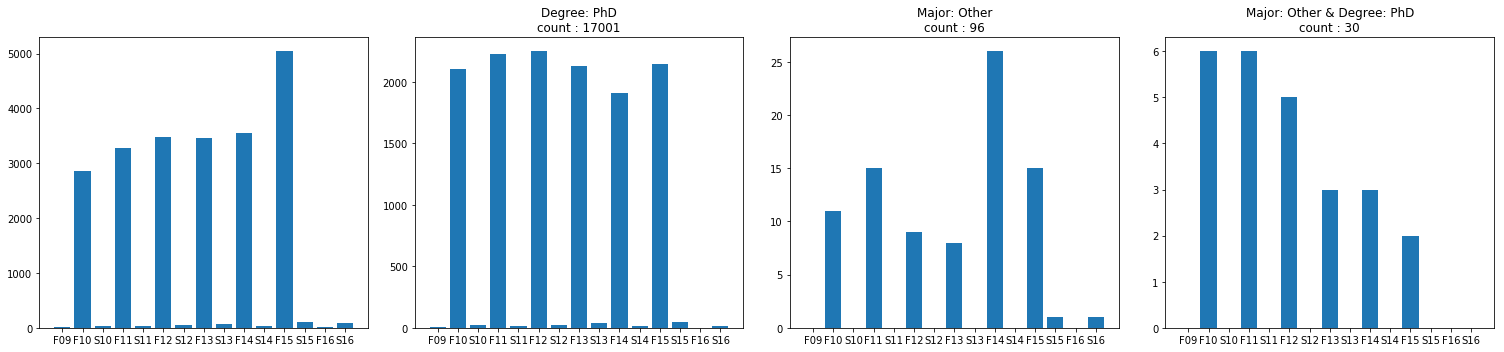

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
********************************************** Major: Other, Degree: MEng **********************************************


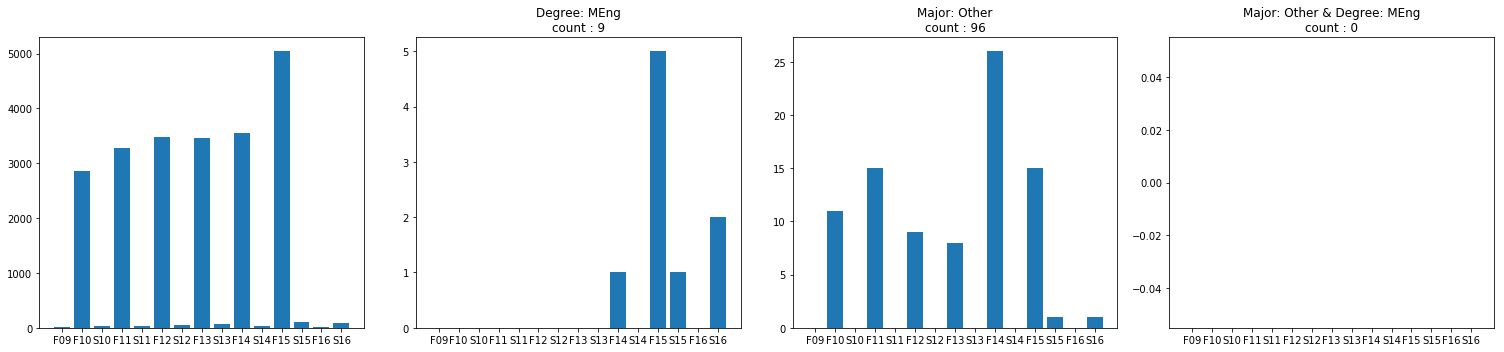

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
********************************************** Major: Other, Degree: MS **********************************************


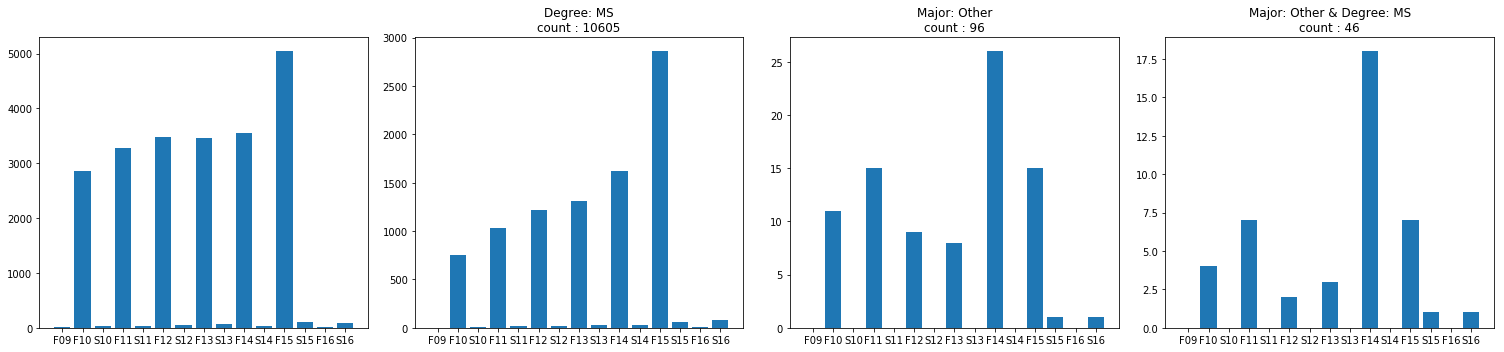

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
********************************************** Major: CS, Degree: PhD **********************************************


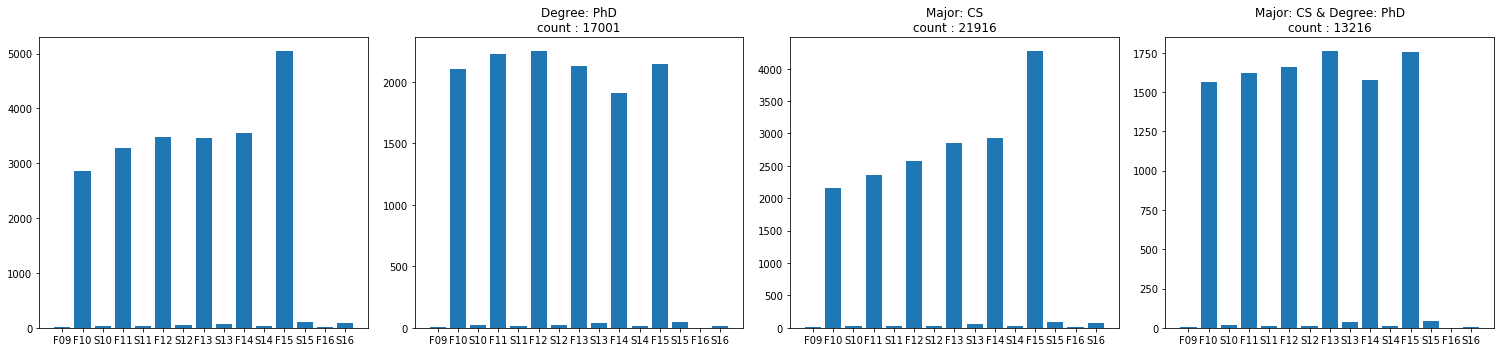

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
********************************************** Major: CS, Degree: MEng **********************************************


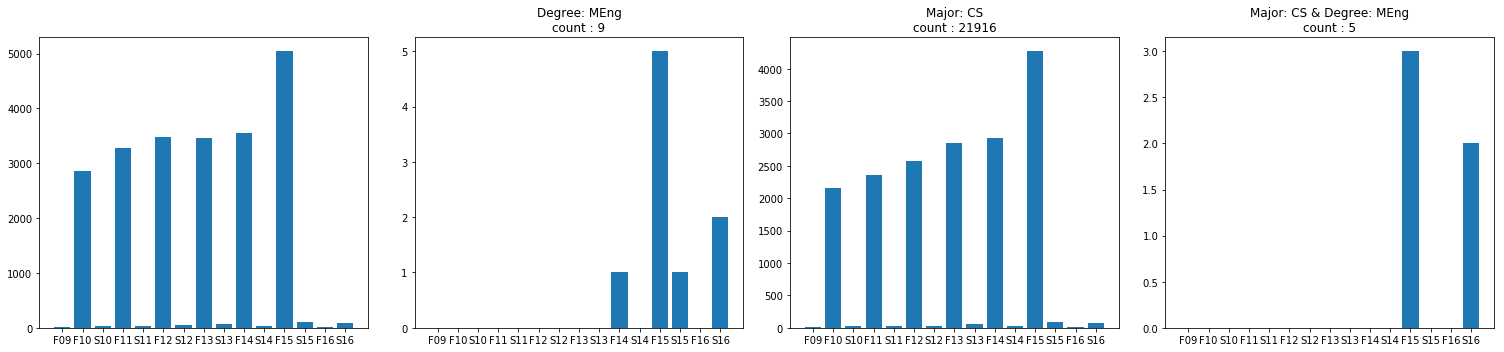

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
********************************************** Major: CS, Degree: MS **********************************************


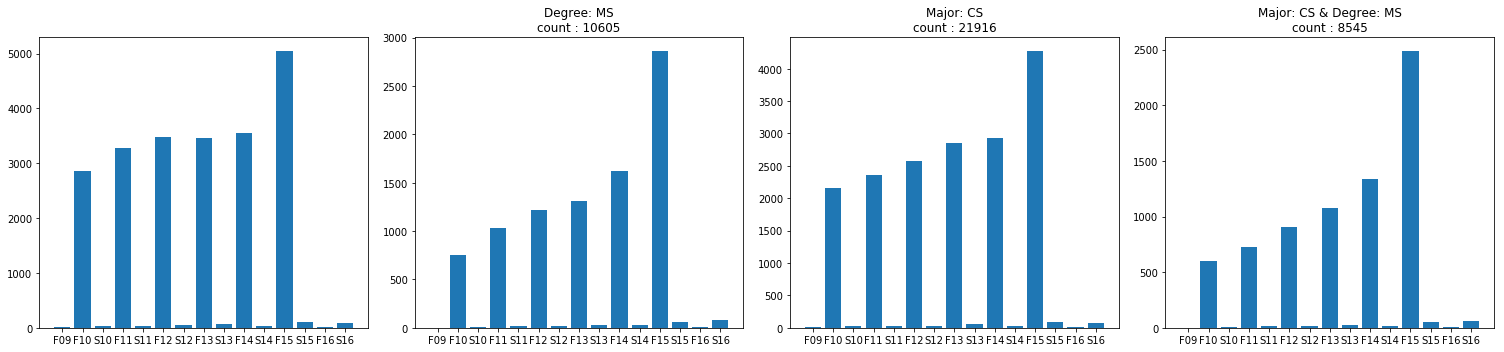

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
********************************************** Major: ECE, Degree: PhD **********************************************


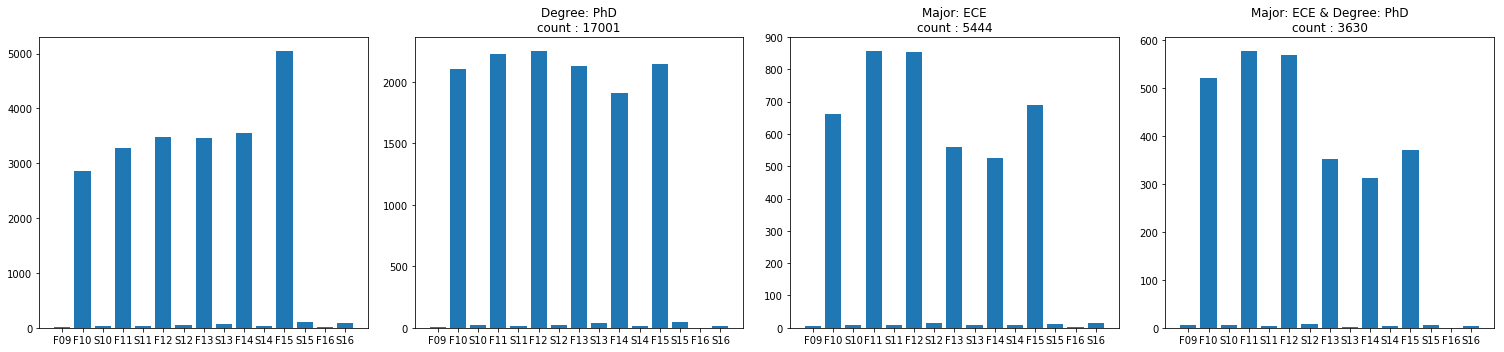

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
********************************************** Major: ECE, Degree: MEng **********************************************


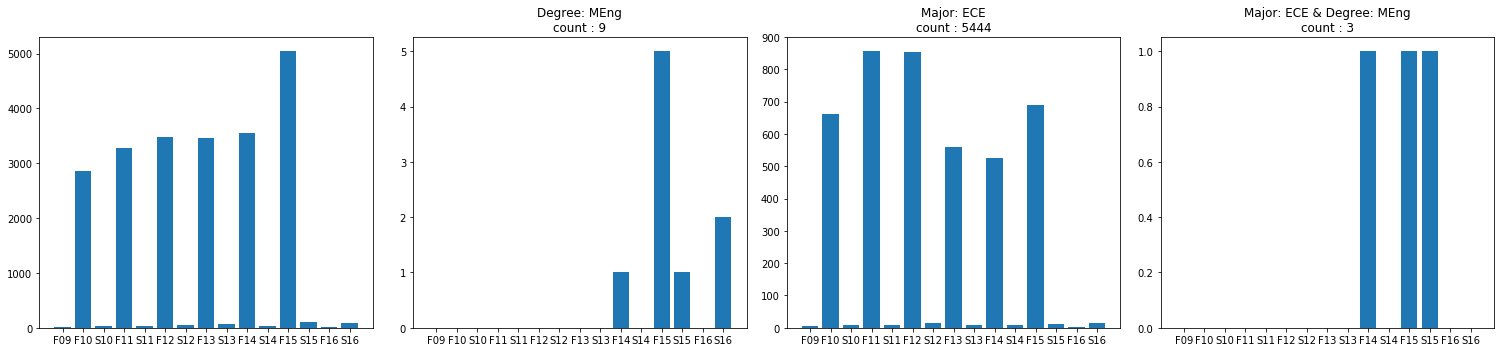

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
********************************************** Major: ECE, Degree: MS **********************************************


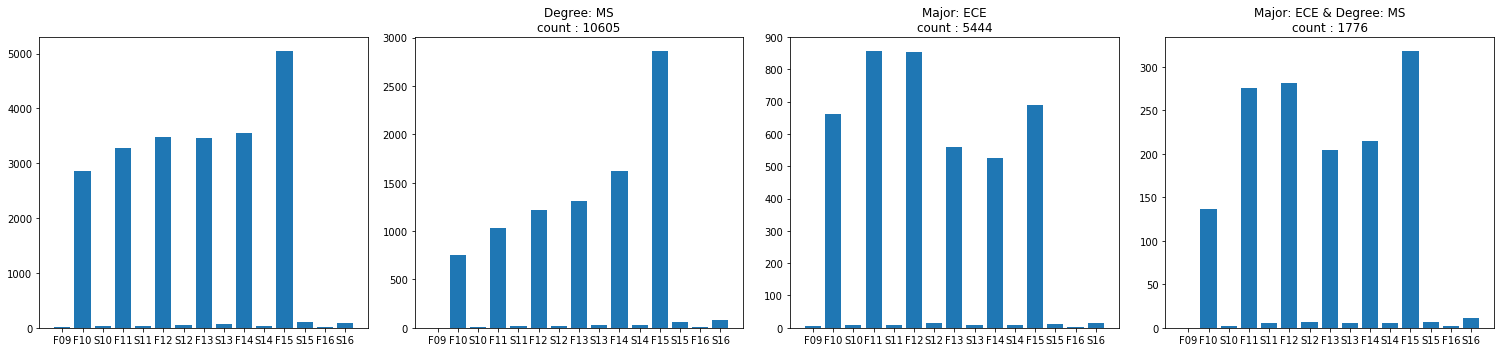

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------


In [57]:
season_names = ['F09', 'F10', 'S10', 'F11', 'S11',  'F12', 'S12', 'F13', 'S13', 'F14', 'S14', 'F15', 'S15', 'F16', 'S16']

save_dir = "data/output/figure/"

majors = set(df["major"])
print("All majors: {}".format(majors))
select_majors = {'CS', 'ECE', 'Other'}


degrees = set(df["degree"])
print("All degrees: {}".format(degrees))
select_degrees =  {'PhD', 'MS', 'MEng'}

for major in select_majors:
    for degree in select_degrees:
        print("*"*46, "Major: {}, Degree: {}".format(major, degree),"*"*46)
        plot_time_series_stat(df, season_names, major, degree, save_dir)
        print("-"*120)
        print("-"*120)

In [13]:
univ_accepted = df[(df["uni_name"]==uni_name) & (df["major"]==major) & (df["season"]==season) & (df["degree"]==degree) & (df["decision"]==decision) & (df["status"]==status)]
# univ_accepted[headers_cs_select]
univ_accepted[headers_cs_select]

In [234]:
univ_accepted.groupby(["season"]).mean()

,rowid,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,gre_subject,post_timestamp
season,,,,,,,,
F10,20617.000000,1.268399e+09,3.970000,750.000000,800.000000,4.000000,890.0,1.268428e+09
F11,17470.750000,1.299733e+09,3.760000,560.000000,800.000000,4.000000,NaN,1.299981e+09
F12,13909.000000,1.331330e+09,3.890000,277.000000,377.666667,3.666667,NaN,1.331330e+09
F13,10399.888889,1.362850e+09,3.377500,151.000000,163.250000,3.750000,NaN,1.363167e+09
F14,7288.375000,1.393606e+09,3.538750,155.250000,157.750000,3.562500,NaN,1.393882e+09
F15,3335.583333,1.425258e+09,3.666667,153.714286,163.857143,3.785714,NaN,1.425308e+09


In [235]:
univ_accepted.groupby(["season"]).count()

,rowid,uni_name,major,degree,decision,decision_method,decision_date,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,is_new_gre,gre_subject,status,post_data,post_timestamp,comments
season,,,,,,,,,,,,,,,,,,
F10,3,3,3,3,3,3,3,3,1,1,1,1,1,1,3,3,3,2
F11,8,8,8,8,8,8,8,8,1,1,1,1,1,0,8,8,8,5
F12,7,7,7,7,7,7,7,7,2,3,3,3,3,0,7,7,7,6
F13,9,9,9,9,9,9,9,9,4,4,4,4,4,0,9,9,9,6
F14,16,16,16,16,16,16,16,16,8,8,8,8,8,0,16,16,16,14
F15,12,12,12,12,12,12,12,12,6,7,7,7,7,0,12,12,12,6


In [276]:
season = "F15"
ad_data = cs_data[(cs_data["major"]==major) & (cs_data["degree"]==degree) & (cs_data["season"]==season) & (cs_data["decision"]==decision) & (cs_data["status"]==status)].groupby(["uni_name"]).count().sort_values("rowid", ascending=False)

In [279]:
ad_data[ad_data["rowid"]>5]

univ_selected = ["Bangladesh University Of Enginnering And Technology", "Carnegie Mellon University (CMU)", "Stanford University", "University Of California, Berkeley (UCB)", "Harvard University", "SUNY Stony Brook", "Boston University (BU)", "University Of California, San Diego (UCSD)", "Cornell University", "University Of Virginia (UVA)", "University Of California, Riverside (UCR)", "Purdue University"]

,rowid,major,degree,season,decision,decision_method,decision_date,decision_timestamp,ugrad_gpa,gre_verbal,gre_quant,gre_writing,is_new_gre,gre_subject,status,post_data,post_timestamp,comments
uni_name,,,,,,,,,,,,,,,,,,
University Of Central Florida (UCF),13,13,13,13,13,13,13,13,10,10,10,10,10,0,13,13,13,8
Purdue University,12,12,12,12,12,12,12,12,1,3,3,3,3,0,12,12,12,10
SUNY Stony Brook,12,12,12,12,12,12,12,12,6,7,7,7,7,0,12,12,12,6
Carnegie Mellon University (CMU),12,12,12,12,12,12,12,12,3,4,4,4,4,0,12,12,12,8
"University Of Illinois, Urbana-Champaign (UIUC)",11,11,11,11,11,11,11,11,4,5,5,5,5,0,11,11,11,8
"University Of Wisconsin, Madison",9,9,9,9,9,9,9,9,4,5,5,5,5,0,9,9,9,7
Georgia Institute Of Technology (GTech),9,9,9,9,9,9,9,9,3,5,5,5,5,0,9,9,9,7
Arizona State University (ASU),9,9,9,9,9,9,9,9,7,7,7,7,7,0,9,9,9,8
Cornell University,8,8,8,8,8,8,8,8,1,2,2,2,2,0,8,8,8,3
